# K-Means Clustering

In [94]:
import tensorflow as tf
import numpy as np
import seaborn as sns
from keras import regularizers
from keras.models import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Reshape, Input, UpSampling2D
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import accuracy_score
import keras.backend as backend
import warnings
warnings.filterwarnings('ignore')

In [70]:
# Data Taken form keras datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = np.reshape(x_train,newshape = (60000, 784))
x_test = np.reshape(x_test,newshape = (10000, 784))

#normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [71]:
clusters = len(np.unique(y_train))
model = KMeans(n_clusters = clusters, max_iter=500, random_state=72)

In [72]:
model.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=72, tol=0.0001, verbose=0)

In [33]:
y_pred_vknn = model.predict(x_test)

## Function to adjust cluster labels and find accuracy

In [133]:
from sklearn.utils.linear_assignment_ import linear_assignment
def adjust_labels_calc_acc(y_test, y_pred):
    y_true = y_test.astype(np.int64)
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)

    #Creating a confusion matrix
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    ind = linear_assignment(-w)
    acc = sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size
    return acc

In [81]:
print("Accuracy after adjusting labels {:.2f}".format(adjust_labels_calc_acc(y_test, y_pred_vknn)))

Accuracy after adjusting labels 0.55


In [82]:
print("AMIS: {:.2f}".format(metrics.adjusted_mutual_info_score(y_test, y_pred_vknn)))

AMIS: 0.51


C:\Users\Shadow\Anaconda3\envs\dl\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


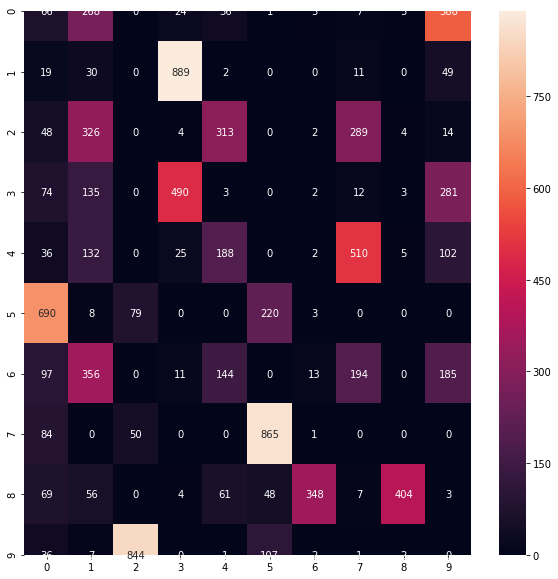

In [79]:
conf_mat = confusion_matrix(y_test, y_pred_vknn)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat,annot = True, fmt = 'd')
plt.show()

# K-Means Clustering augmented with Deep Auto Encoders

In [83]:
#Keras Auto Encoder Model using Artifical Neural Networks
input_img = Input(shape=(784,))
encoded = Dense(900, activation='relu')(input_img)
encoded = Dense(480, activation='relu')(encoded)
encoded = Dense(240, activation='relu')(encoded)
encoded = Dense(120, activation='relu')(encoded)
decoded = Dense(240, activation='relu')(encoded)
decoded = Dense(480, activation='relu')(decoded)
decoded = Dense(900, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [101]:
aenc = Model(input_img, decoded)
aenc.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 900)               706500    
_________________________________________________________________
dense_48 (Dense)             (None, 480)               432480    
_________________________________________________________________
dense_49 (Dense)             (None, 240)               115440    
_________________________________________________________________
dense_50 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_51 (Dense)             (None, 240)               29040     
_________________________________________________________________
dense_52 (Dense)             (None, 480)               115

In [86]:
aenc.compile(optimizer='adam', loss='categorical_crossentropy')
aenc.fit(x_train, x_train,epochs=200,batch_size=128,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 7s 120us/step - loss: 1363.2288 - val_loss: 1353.6753
Epoch 2/200
60000/60000 [==============================] - 4s 64us/step - loss: 1346.2196 - val_loss: 1349.3228
Epoch 3/200
60000/60000 [==============================] - 4s 64us/step - loss: 1343.2198 - val_loss: 1347.0922
Epoch 4/200
60000/60000 [==============================] - 4s 65us/step - loss: 1341.4484 - val_loss: 1345.6652
Epoch 5/200
60000/60000 [==============================] - 4s 65us/step - loss: 1340.2473 - val_loss: 1344.8187
Epoch 6/200
60000/60000 [==============================] - 4s 64us/step - loss: 1339.4308 - val_loss: 1343.8955
Epoch 7/200
60000/60000 [==============================] - 4s 66us/step - loss: 1338.7226 - val_loss: 1343.6223
Epoch 8/200
60000/60000 [==============================] - 4s 66us/step - loss: 1338.1069 - val_loss: 1342.8955
Epoch 9/200
60000/60000 [============================

60000/60000 [==============================] - 4s 64us/step - loss: 1332.1731 - val_loss: 1339.1567
Epoch 74/200
60000/60000 [==============================] - 4s 64us/step - loss: 1332.1170 - val_loss: 1339.2903
Epoch 75/200
60000/60000 [==============================] - 4s 64us/step - loss: 1332.0902 - val_loss: 1339.1949
Epoch 76/200
60000/60000 [==============================] - 4s 63us/step - loss: 1332.1202 - val_loss: 1339.2048
Epoch 77/200
60000/60000 [==============================] - 4s 63us/step - loss: 1332.0543 - val_loss: 1339.1468
Epoch 78/200
60000/60000 [==============================] - 4s 64us/step - loss: 1332.0308 - val_loss: 1339.3252
Epoch 79/200
60000/60000 [==============================] - 4s 67us/step - loss: 1332.0434 - val_loss: 1339.1796
Epoch 80/200
60000/60000 [==============================] - 4s 67us/step - loss: 1332.0188 - val_loss: 1339.2364
Epoch 81/200
60000/60000 [==============================] - 4s 66us/step - loss: 1331.9944 - val_loss: 1339.1

60000/60000 [==============================] - 4s 63us/step - loss: 1331.3190 - val_loss: 1339.0141
Epoch 146/200
60000/60000 [==============================] - 4s 62us/step - loss: 1331.2684 - val_loss: 1338.7611
Epoch 147/200
60000/60000 [==============================] - 4s 62us/step - loss: 1331.2909 - val_loss: 1338.9090
Epoch 148/200
60000/60000 [==============================] - 4s 62us/step - loss: 1331.2599 - val_loss: 1338.9242
Epoch 149/200
60000/60000 [==============================] - 4s 62us/step - loss: 1331.2721 - val_loss: 1339.0250
Epoch 150/200
60000/60000 [==============================] - 4s 62us/step - loss: 1331.2522 - val_loss: 1339.0212
Epoch 151/200
60000/60000 [==============================] - 4s 62us/step - loss: 1331.2785 - val_loss: 1338.8703
Epoch 152/200
60000/60000 [==============================] - 4s 62us/step - loss: 1331.2267 - val_loss: 1338.8665
Epoch 153/200
60000/60000 [==============================] - 4s 63us/step - loss: 1331.2200 - val_loss

In [87]:
encoder = Model(inputs=aenc.input, outputs=aenc.layers[3].output)
encoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 900)               706500    
_________________________________________________________________
dense_40 (Dense)             (None, 480)               432480    
_________________________________________________________________
dense_41 (Dense)             (None, 240)               115440    
Total params: 1,254,420
Trainable params: 1,254,420
Non-trainable params: 0
_________________________________________________________________


In [88]:
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

In [89]:
model = KMeans(n_clusters = clusters, max_iter=500, random_state=72)
model.fit(x_train_encoded)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=72, tol=0.0001, verbose=0)

In [138]:
y_pred_aknn = model.predict(x_test_encoded)
print("AMIS: {:.2f}".format(metrics.adjusted_mutual_info_score(y_test, y_pred_aknn)))

AMIS: 0.20


In [137]:
print("Accuracy: {:.2f}".format(adjust_labels_calc_acc(y_test, y_pred_aknn)))

Accuracy: 0.26


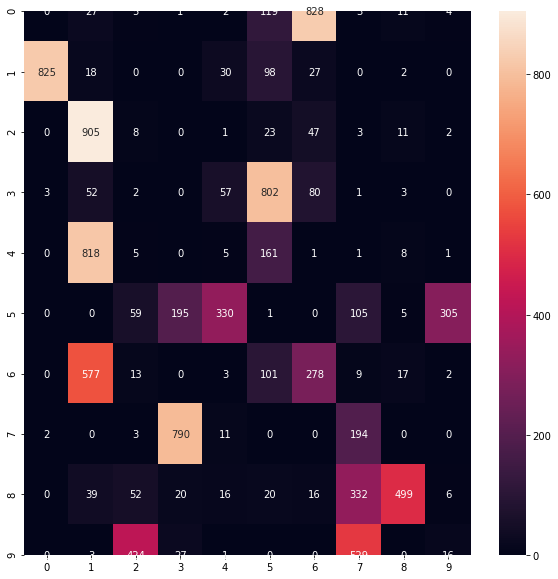

In [110]:
conf_mat = confusion_matrix(y_test, y_pred_aknn)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat,annot = True, fmt = 'd')
plt.show()

# Gaussian Mixture Models augmented by Deep Auto Encoders

In [115]:
input_img = Input(shape=(784,))
encoded = Dense(900, activation='relu')(input_img)
encoded = Dense(480, activation='relu')(encoded)
encoded = Dense(240, activation='relu')(encoded)
encoded = Dense(120, activation='relu')(encoded)
decoded = Dense(240, activation='relu')(encoded)
decoded = Dense(480, activation='relu')(decoded)
decoded = Dense(900, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [116]:
aenc = Model(input_img, decoded)
aenc.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 900)               706500    
_________________________________________________________________
dense_56 (Dense)             (None, 480)               432480    
_________________________________________________________________
dense_57 (Dense)             (None, 240)               115440    
_________________________________________________________________
dense_58 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_59 (Dense)             (None, 240)               29040     
_________________________________________________________________
dense_60 (Dense)             (None, 480)               115

In [117]:
aenc.compile(optimizer='adam', loss='categorical_crossentropy')
aenc.fit(x_train, x_train,epochs=200,batch_size=128,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 4s 69us/step - loss: 1364.1365 - val_loss: 1353.7160
Epoch 2/200
60000/60000 [==============================] - 4s 64us/step - loss: 1346.8044 - val_loss: 1349.7951
Epoch 3/200
60000/60000 [==============================] - 4s 64us/step - loss: 1343.8819 - val_loss: 1347.5806
Epoch 4/200
60000/60000 [==============================] - 4s 64us/step - loss: 1341.9787 - val_loss: 1346.1492
Epoch 5/200
60000/60000 [==============================] - 4s 64us/step - loss: 1340.6910 - val_loss: 1344.9182
Epoch 6/200
60000/60000 [==============================] - 4s 64us/step - loss: 1339.6571 - val_loss: 1344.2809
Epoch 7/200
60000/60000 [==============================] - 4s 65us/step - loss: 1338.9047 - val_loss: 1343.6285
Epoch 8/200
60000/60000 [==============================] - 4s 65us/step - loss: 1338.2818 - val_loss: 1343.1314
Epoch 9/200
60000/60000 [=============================

60000/60000 [==============================] - 4s 64us/step - loss: 1332.1072 - val_loss: 1339.1339
Epoch 74/200
60000/60000 [==============================] - 4s 64us/step - loss: 1332.0876 - val_loss: 1338.9021
Epoch 75/200
60000/60000 [==============================] - 4s 64us/step - loss: 1332.0529 - val_loss: 1339.0785
Epoch 76/200
60000/60000 [==============================] - 4s 63us/step - loss: 1332.0368 - val_loss: 1339.0249
Epoch 77/200
60000/60000 [==============================] - 4s 63us/step - loss: 1332.0054 - val_loss: 1338.9769
Epoch 78/200
60000/60000 [==============================] - 4s 63us/step - loss: 1332.0001 - val_loss: 1339.2166
Epoch 79/200
60000/60000 [==============================] - 4s 63us/step - loss: 1331.9849 - val_loss: 1338.9855
Epoch 80/200
60000/60000 [==============================] - 4s 64us/step - loss: 1331.9466 - val_loss: 1339.0477
Epoch 81/200
60000/60000 [==============================] - 4s 65us/step - loss: 1331.9822 - val_loss: 1339.0

60000/60000 [==============================] - 4s 63us/step - loss: 1331.2371 - val_loss: 1338.8325
Epoch 146/200
60000/60000 [==============================] - 4s 63us/step - loss: 1331.2030 - val_loss: 1338.7567
Epoch 147/200
60000/60000 [==============================] - 4s 63us/step - loss: 1331.1879 - val_loss: 1338.9070
Epoch 148/200
60000/60000 [==============================] - 4s 63us/step - loss: 1331.1533 - val_loss: 1338.8052
Epoch 149/200
60000/60000 [==============================] - 4s 63us/step - loss: 1331.1763 - val_loss: 1338.6671
Epoch 150/200
60000/60000 [==============================] - 4s 63us/step - loss: 1331.2278 - val_loss: 1338.8299
Epoch 151/200
60000/60000 [==============================] - 4s 63us/step - loss: 1331.1996 - val_loss: 1338.8222
Epoch 152/200
60000/60000 [==============================] - 4s 63us/step - loss: 1331.1554 - val_loss: 1338.6270
Epoch 153/200
60000/60000 [==============================] - 4s 63us/step - loss: 1331.1705 - val_loss

In [118]:
encoder = Model(inputs=aenc.input, outputs=aenc.layers[3].output)
encoder.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 900)               706500    
_________________________________________________________________
dense_56 (Dense)             (None, 480)               432480    
_________________________________________________________________
dense_57 (Dense)             (None, 240)               115440    
Total params: 1,254,420
Trainable params: 1,254,420
Non-trainable params: 0
_________________________________________________________________


In [127]:
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

In [128]:
gmm_model = GMM(n_components = clusters, max_iter=500, random_state=72)
gmm_model.fit(x_train_encoded)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=500,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=72, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [129]:
y_pred_agmm = gmm_model.predict(x_test_encoded)

In [134]:
print("AMIS: {:.2f}".format(metrics.adjusted_mutual_info_score(y_test, y_pred_agmm)))

AMIS: 0.46


In [135]:
print("Accuracy: {:.2f}".format(adjust_labels_calc_acc(y_test, y_pred_agmm)))

Accuracy: 0.49


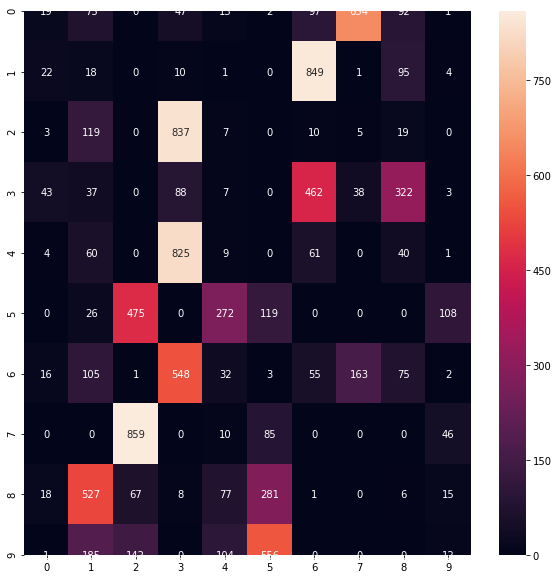

In [132]:
conf_mat = confusion_matrix(y_test, y_pred_agmm)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat,annot = True, fmt = 'd')
plt.show()

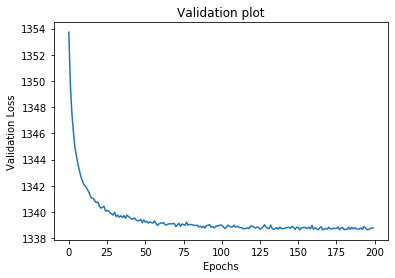

In [125]:
plt.plot(aenc.history.history['val_loss'])   # Plotting the validation loss
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation plot')
plt.show()

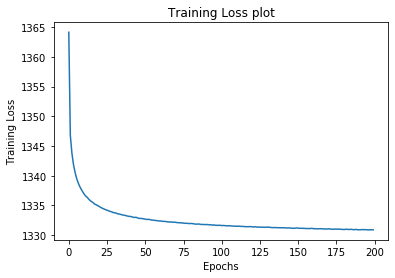

In [126]:
plt.plot(aenc.history.history['loss'])  # Plotting the training loss
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss plot')
plt.show()